<a href="https://colab.research.google.com/github/hhemesat/MAT-421/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Error and Instability

---



Let us use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve pendulum equation over time interval [0,10] in increments of 0.5 with an initial solution of S0 = [1,0] for model parameters using sqrt(g/l) = 5. 

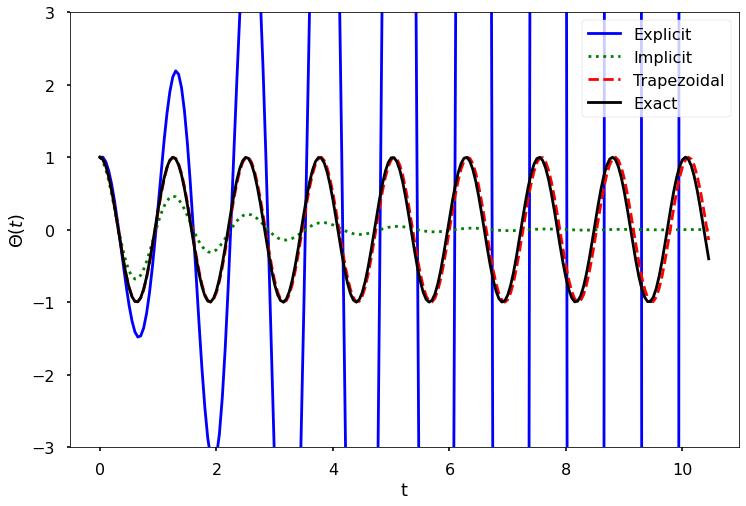

In [6]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline 
h = 0.05 #step size
t = np.arange(0, 10.5, h)
#oscillation freq. of pendulum
w = 5
s0 = np.array([[1], [0]])
m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))
#integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T
for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])   
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

The results show that the closest approximation to the exact solution is the Trapezoidal formula, but it also exhibts a slight phase shift as time progresses. The Explicit and implicit methods are very unstable in opposite ways. 

# Python ODE Solvers

---



Let us consider the ODE dS(t)/dt = sin(t) for an initial value S0 = 0. We use solve_ivp to estimate the solution over the interval [0, pi]. We know that the exact solution is S(t) = -cos(t)

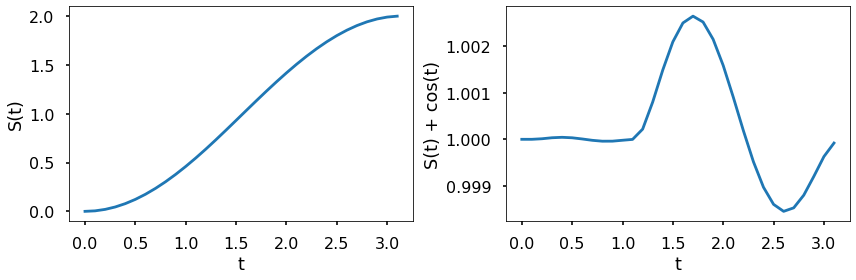

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline
F = lambda t, s: np.sin(t)
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.tight_layout()
plt.show()

Let us rtol and atol to make the difference between the approxiamte and exact solution less than 1e^-7

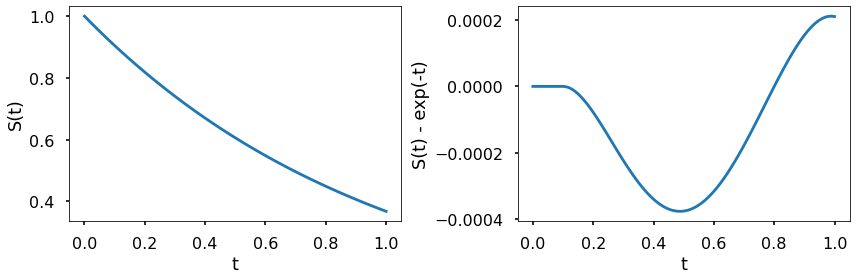

In [8]:
F = lambda t, s: -s
t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

Let the state of a system be defined by S(t) = [x(t), y(t)], and let the evolution be defined by the ODE dS(t)/dt = [[0, -2t],[2t^2,0]], and let us use solve_ivp to solve this ODE for the time interval [0,5] with an intial solution S0=[1,0]

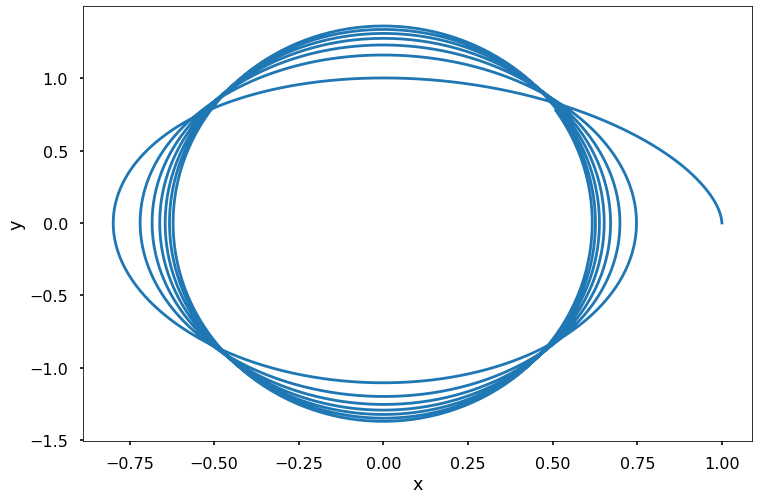

In [18]:
F = lambda t, s: np.dot(np.array([[0, -2*t], [2*t**2, 0]]), s)

t_eval = np.arange(0, 5.001, 0.001)
sol = solve_ivp(F, [0, 10], [1, 0], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()